In [1]:
# want to store this notebook in the notebooks folder, but want to keep non-relative imports
import os
os.chdir("..")

In [2]:
import data
import data.gene_datasets, data.graph
import networkx as nx
import matplotlib, matplotlib.pyplot as plt
import numpy as np


/u/weissmar/venv/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
def sample_neighbors(g, gene, num_neighbors, include_self=True):
    results = set([])
    if include_self:
        results = set([gene])
    all_nodes = set(g.nodes)
    first_degree = set(g.neighbors(gene))
    second_degree = set()
    for x in g.neighbors(gene):
        second_degree = second_degree.union(set(g.neighbors(x)))
    while len(results) < num_neighbors:
        if len(first_degree) - len(results) > 0:
            unique = sorted(first_degree - results)
            results.add(unique.pop())
        elif len(second_degree) - len(results) > 0:
            unique = sorted(second_degree - results)
            results.add(unique.pop())
        else:
            unique = sorted(all_nodes - results)
            results.add(unique.pop())
    return results

In [4]:
tcgatissue = data.gene_datasets.TCGATissue()

Converting one-hot labels to integers


In [10]:
graph = data.graph.Graph()
path = "/data/lisa/data/genomics/graph/pancan-tissue-graph.hdf5"
graph.load_graph(path)

G = nx.from_numpy_matrix(graph.adj)
mapping = dict(zip(range(0, len(tcgatissue.df.columns)), tcgatissue.df.columns))
G = nx.relabel_nodes(G, mapping)

In [11]:
print list(G.nodes())

['UBE2Q1', 'RNF14', 'RNF17', 'RNF10', 'RNF11', 'RNF13', 'REM1', 'REM2', 'C16orf13', 'UCHL5', 'UBE2Q2', 'MZT2A', 'MZT2B', 'ATRX', 'PMM2', 'PMM1', 'ASS1', 'FHIT', 'SPX', 'ZNF709', 'ZNF708', 'ZNF879', 'ZNF878', 'CBX3', 'ATRIP', 'CAMK1', 'ZNF701', 'ZNF700', 'ZNF707', 'ZNF706', 'ZNF704', 'ZC3H10', 'RNF114', 'RNF115', 'RNF112', 'ZC3H14', 'SPN', 'RNF111', 'ZC3H18', 'GRIN1', 'SP8', 'DHX9', 'TCOF1', 'NSRP1', 'NUP98', 'XPC', 'SP1', 'XPA', 'SP3', 'NUP93', 'SP5', 'SP6', 'CAMKV', 'SPPL3', 'GOLIM4', 'OPA3', 'OPA1', 'RHEB', 'RAB40C', 'RAB40B', 'RAB40A', 'COL7A1', 'GTSE1', 'B2M', 'B4GALNT1', 'TOR4A', 'SLC7A11', 'SPPL2A', 'SPPL2B', 'NOP9', 'ITGA9', 'UGCG', 'MYO3B', 'ATP2A1', 'ATP2A2', 'ATP2A3', 'ITGA1', 'ITGA2', 'ITGA3', 'ITGA4', 'ITGA5', 'RIT1', 'ITGA7', 'TRHR', 'DENND4A', 'DOLPP1', 'DENND4C', 'SWAP70', 'PREB', 'PHLDA1', 'PHLDA3', 'PHLDA2', 'GAP43', 'MDK', 'C9orf40', 'HRH4', 'FBXL12', 'HRH2', 'HRH3', 'FBXL17', 'HRH1', 'FAM169A', 'FBXL18', 'ACVRL1', 'GHDC', 'SDK1', 'SDK2', 'GRP', 'TPRN', 'FAM212B', 'FA

In [12]:
def neighborsOf(graph, nodes, excludes):
    neighbors = set()
    for x in nodes:
        neighbors = neighbors.union(set(graph.neighbors(x)))
    return list(neighbors.difference(set(excludes)))

def removeEdgesBetween(graph, nodes):
    for n1 in nodes:
        for n2 in nodes:
            if graph.has_edge(n1,n2):
                graph.remove_edge(n1,n2)

In [257]:
#G.remove_nodes_from(np.asarray(list(G.nodes()))[[1,2,4]])

In [13]:
G = nx.from_numpy_matrix(graph.adj)
mapping = dict(zip(range(0, len(tcgatissue.df.columns)), tcgatissue.df.columns))
G = nx.relabel_nodes(G, mapping)

In [16]:
zero_degree = ["S100A8"]
first_degree = neighborsOf(G, zero_degree, zero_degree)[:5]
second_degree = neighborsOf(G, first_degree, first_degree)[:10]
third_degree = neighborsOf(G, second_degree, second_degree)[:20]

In [17]:
toremove = set(G.nodes())
toremove = toremove.difference(zero_degree).difference(first_degree).difference(second_degree).difference(third_degree)
G.remove_nodes_from(toremove)

In [18]:
removeEdgesBetween(G, first_degree)
removeEdgesBetween(G, second_degree)
removeEdgesBetween(G, third_degree)
removeEdgesBetween(G, first_degree + third_degree)
removeEdgesBetween(G, zero_degree + second_degree)
removeEdgesBetween(G, zero_degree + third_degree)

(-86.8442145497281, 86.84421454972812, -86.7601317641433, 86.7601317641433)

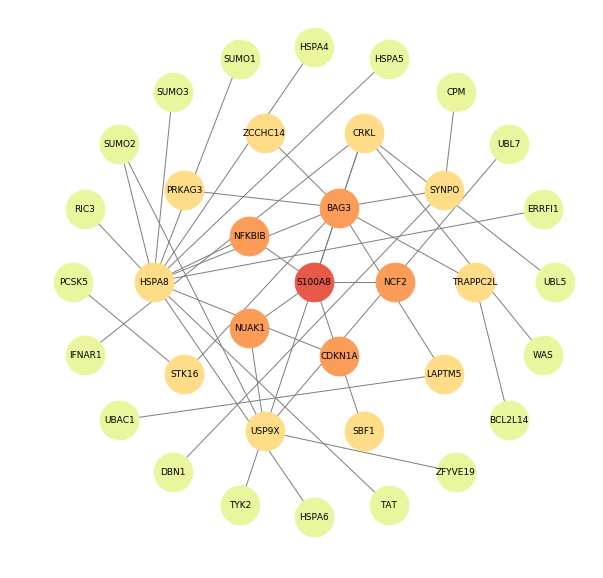

In [19]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
shells = [zero_degree, first_degree, second_degree, third_degree]
cmap = matplotlib.cm.get_cmap('Spectral')
#pos = nx.spring_layout(G, k=0.5)
pos = nx.shell_layout(G, shells, scale=100)
#pos = nx.circular_layout(G)



#nx.draw_networkx(G, pos, node_color="lightblue",with_labels=True, node_size=1000)

nx.draw_networkx_nodes(G,pos,nodelist=zero_degree, with_labels=True, node_size=1500,node_color=cmap(40))

nx.draw_networkx_nodes(G,pos,nodelist=first_degree, node_size=1500,node_color=cmap(70))

nx.draw_networkx_nodes(G,pos,nodelist=second_degree, node_size=1500,node_color=cmap(100))

nx.draw_networkx_nodes(G,pos,nodelist=third_degree, node_size=1500,node_color=cmap(150))

nx.draw_networkx_edges(G,pos, edge_color="gray");

nx.draw_networkx_labels(G,pos,font_size=9);
plt.axis('off')